In [6]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [7]:
faces_all = fetch_olivetti_faces()

In [8]:
X = faces_all.data
y = faces_all.target

In [9]:
print(X.shape)
#print(y)

(400, 4096)


In [10]:
print(X[0])

[0.30991736 0.3677686  0.41735536 ... 0.15289256 0.16115703 0.1570248 ]


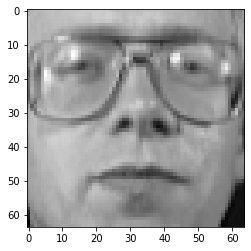

In [11]:
plt.imshow(X[11].reshape(64,64), cmap="gray")

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(200, 4096)
(200, 4096)
(200,)
(200,)


In [13]:
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train) 

C:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
np.mean(log_reg.predict(X_test) == Y_test)

0.845

In [15]:
pca = PCA(n_components=50)   # 4096 -> 140
pca.fit(X_train)

print(X_train.shape)

lowX = pca.transform(X_train)
print(lowX.shape)

(200, 4096)
(200, 50)


In [16]:
recon = pca.inverse_transform(lowX)

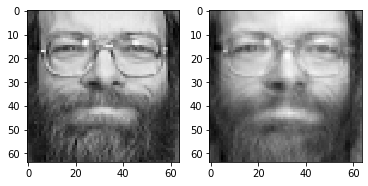

In [17]:
plt.subplot(121)
plt.imshow( X_train[123].reshape(64,64), cmap='gray')
plt.subplot(122)
plt.imshow( recon[123].reshape(64,64), cmap='gray')

In [18]:
log_reg.fit(lowX, Y_train)

C:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
#pca = PCA(n_components=50)   # 4096 ->  50
#pca.fit(X_test)
lowX_test = pca.transform(X_test)
np.mean(log_reg.predict(lowX_test) == Y_test)

0.89

In [20]:
print(pca.singular_values_)

[63.515583  46.108387  36.295414  28.401543  25.362177  22.804403
 20.265388  18.383314  17.514664  16.602535  15.553007  15.221132
 14.493651  13.833625  13.089796  12.76197   12.458728  11.679206
 11.457306  10.795889  10.445475  10.094807   9.937403   9.643618
  9.399011   9.181138   8.9589     8.874779   8.687084   8.318105
  8.057748   7.871774   7.7807193  7.596855   7.461429   7.1855483
  7.085403   7.0378613  6.835502   6.7577977  6.6399803  6.5787597
  6.4982986  6.356635   6.2501116  6.123757   6.070708   5.981033
  5.891097   5.787597 ]


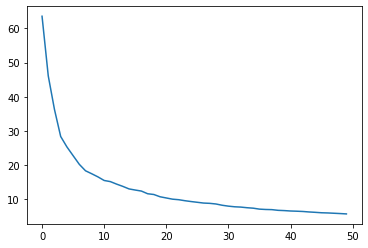

In [21]:
plt.plot(pca.singular_values_)

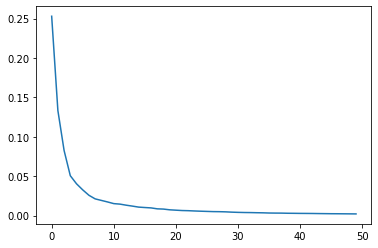

In [22]:
plt.plot(pca.explained_variance_ratio_)

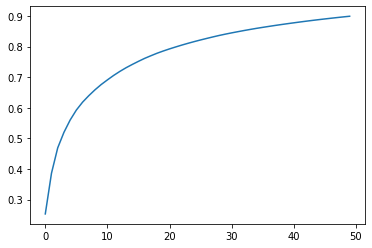

In [23]:
cs = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cs)

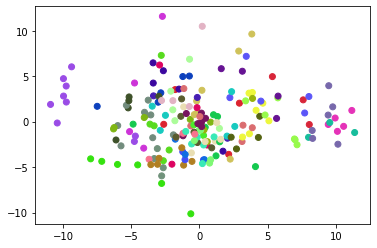

In [24]:
col =  np.random.rand(40,3)
colors = [col[i]  for i in Y_train ]
plt.scatter(lowX[:,0], lowX[:,1], c=colors)

(200, 2)
(200, 1)


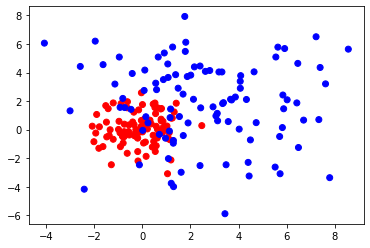

In [25]:
samples = 100

x_data0 = np.random.normal(0, 1, size=[samples,2])  # r == 0 
x_data1 = np.random.normal(2, 3, size=[samples,2])  # b == 1
x_data = np.vstack([x_data0, x_data1])
print(x_data.shape)

y_data = np.vstack([np.zeros(samples).reshape(samples,1) , np.ones(samples).reshape(samples,1) ]) 
print(y_data.shape)

colors = ["red"  if i == 0  else  "blue"  for i  in y_data   ]

plt.scatter(x_data[:,0], x_data[:,1], color=colors)

In [26]:
model = KMeans(n_clusters=2, init="random", max_iter=6).fit(x_data)
print(model.cluster_centers_)

[[0.01562149 0.21193354]
 [3.98337798 2.64521158]]


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1
 1 0 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 0 0 0 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1 0 1 0
 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0]


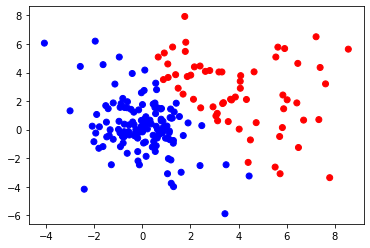

In [27]:
d = ['blue', 'red']
print(model.labels_)
colors = [  d[i] for i in model.labels_]
plt.scatter(x_data[:,0], x_data[:,1], color=colors)

In [28]:
model = KMeans(n_clusters=40, init="random", max_iter=6).fit(X)

print(model.labels_)
print(y)

[35  4 35 10  4 10 35 35 35 19  8  8  8  8 20  8  8  8  8  8 23 23 23 37
 37 24 24 24 19 19 12 12 12 32 32 10 12 12 20  4 12 23 23 12 10 24 12 24
 24 24 32 32 32 27 27 27 27 27 27 27  5  5 31 36 36 31  5  5 31  2 39 39
 39  4 39 39  4 39 10  4  1  1  1 26  1 26 26 26  1  1 19 19  4  4 19 19
  4 19 10  9 11 11 11 11 11 11 11 11 11 11 19  1 26  1  1 24  1 19 19 19
  0  0 12 26  0  4 10 10 32  0 33 33 33 33 33 33 33 33 33 33 20 12 20 20
 12 20 12 12 12 12 20 35 35 34 34 20  4 10 35 35 17 17 29 29 17 10 10 17
 10 10 32 31 31 31 31 31 31 31 31 31 36 36 36  5  5 36  5  5  5 36 38 38
 38 12 24 12 24 24 24 38 38 38 38 37 37 37 37 37 37 37  3  3  3  3  3  3
  3  3  3  3 30 32  1 26  1 26  1 32 10 30 12 12 13 13 23 13 12 12 13 13
 15 15 15 15 26 15 15 26 15 15 29 29 29 29 29 29 30 29 29 15 21 21 21 21
 21 21 21 21 21 21  6 29  6 30  6  6  6  6 29  6 14 14 14 37 37 37 37 13
 14 14 23 38 23 38 38 38 38 38 38 38  0 22 22 22 22 38 38  0 38 22 16 16
 16 16 16 16 28 16 16 16  7  7  7  7  7  7  7  7  7

In [29]:
iris = datasets.load_iris()

X = iris.data
y = iris.target

print(X)
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [30]:
pca = PCA(n_components=1)  
pca.fit(X)
pca.explained_variance_ratio_

array([0.92461872])

In [31]:
low = pca.transform(X)

In [32]:
model = KMeans(n_clusters=6, init="random", max_iter=6).fit(low)

In [33]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 4, 2, 4, 2, 0, 2, 4, 0, 4, 4, 2, 0, 2,
       4, 4, 2, 4, 2, 4, 2, 2, 4, 2, 2, 2, 2, 0, 4, 0, 4, 2, 4, 2, 2, 2,
       4, 4, 4, 2, 4, 0, 4, 4, 4, 4, 0, 4, 3, 2, 5, 3, 3, 5, 4, 5, 3, 5,
       3, 3, 3, 2, 2, 3, 3, 5, 5, 2, 3, 2, 5, 2, 3, 5, 2, 2, 3, 3, 5, 5,
       3, 2, 3, 5, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 2])

In [34]:
col =  ['red', 'blue', 'black', 'yellow', 'cyan', 'green']
colors = [col[i]  for i in model.labels_ ]
plt.scatter(low[:,0], low[:,1], c=colors)

IndexError: index 1 is out of bounds for axis 1 with size 1

In [ ]:
col =  ['red', 'blue', 'black']
colors = [col[i]  for i in model.labels_ ]
plt.scatter(low[:,0], low[:,1], c=colors, marker='*')

col =  ['red', 'black', 'blue']
colors = [col[i]  for i in y ]
plt.scatter(low[:,0], low[:,1], c=colors, marker='^')


In [ ]:
print(low.shape)
reconX = pca.inverse_transform(low)
print(reconX.shape)

print(X[0:10])
print(reconX[0:10])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

tree = DecisionTreeClassifier(max_depth=7)

iris = load_iris()
X = iris.data
y = iris.target
tree.fit(X, y)

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="iris.dot", feature_names=iris.feature_names,  class_names=iris.target_names, rounded=True, filled=True, impurity=True)


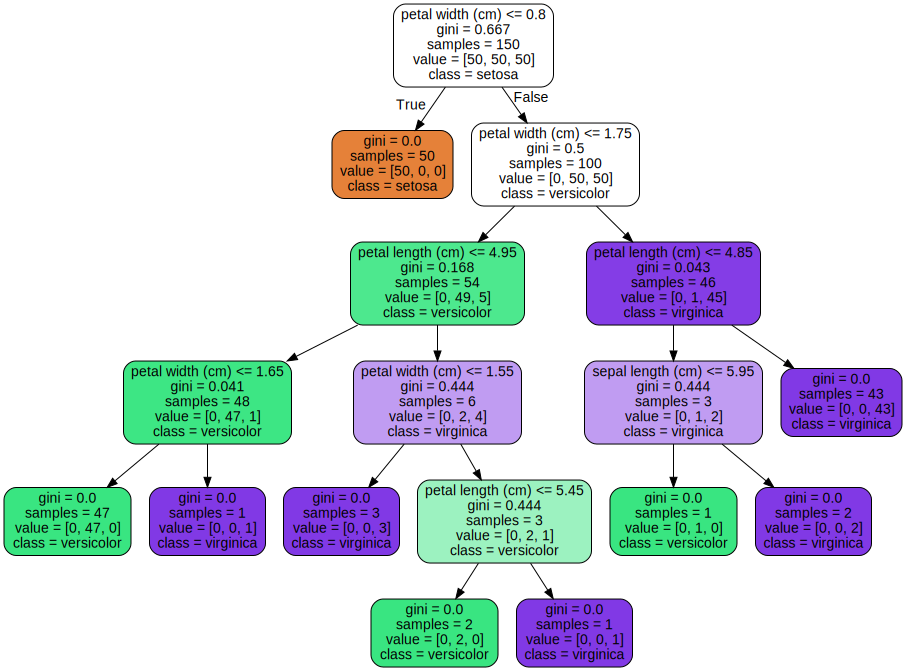

In [43]:
import pydot
graph = pydot.graph_from_dot_file("iris.dot")[0]
import graphviz
with open("iris.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))
#https://graphviz.gitlab.io/_pages/Download/Download_windows.html   # bin 폴더 path 설정 필요




지니계수가 0이 될 때까지 값이 들어감 - 디맨션이 작은 경우에만 사용가능, 장점: 비선형도 모델링할 수 있다
value = [0, 2, 0] <-- 이 값을 보던데?

In [38]:
X = faces_all.data
y = faces_all.target

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.5)


pca = PCA(n_components=50)   # 4096 -> 140
pca.fit(X_train)

lowX = pca.transform(X_train)

tree= DecisionTreeClassifier(max_depth=14)
tree.fit(lowX, Y_train)

np.mean(tree.predict(lowX) ==Y_train)
# train 데이터는 무조건 좋게 나옴-자잘한 규칙까지 다 만들어가니까.. 


0.945

In [39]:
pca = PCA(n_components=50)   # 4096 -> 140
pca.fit(X_train)

lowX = pca.transform(X_train)
lowX_test = pca.transform(X_test)

tree= DecisionTreeClassifier(max_depth=14)
tree.fit(lowX, Y_train)

np.mean(tree.predict(lowX_test) ==Y_test)
# 근데 test 데이터로 하면 확 떨어짐 (아무리 depth높게 해도 test에서는 결과가 안좋음: 일반화성능이 떨어짐)

0.365

In [42]:
pca = PCA(n_components=50)
pca.fit(X_train)

lowX = pca.transform(X_train)
lowX_test = pca.transform(X_test)

tree= DecisionTreeClassifier(max_depth=40)
tree.fit(lowX, Y_train)

print(np.mean(tree.predict(lowX) ==Y_train))
print(np.mean(tree.predict(lowX_test) ==Y_test))
# 인식률 비교: "오버피팅" 트레이닝데이터에 너무 많이 맞춰진것. 
# 오버피팅: 학습데이터에 대한 인식률은 100프로인데, 테스트에서는 별로. 변화에 취약

1.0
0.335
